In [1]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

In [2]:


def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        documents = file.read().split('\n')
    return documents

def preprocess_data(documents):
    vectorizer = CountVectorizer(stop_words='english')
    doc_term_matrix = vectorizer.fit_transform(documents)
    return vectorizer.get_feature_names_out(), doc_term_matrix

def create_lsa_model(doc_term_matrix, number_of_topics):
    lsa_model = TruncatedSVD(n_components=number_of_topics)
    lsa_topic_matrix = lsa_model.fit_transform(doc_term_matrix)
    return lsa_model, lsa_topic_matrix

def print_topics(model, feature_names, number_of_words):
    for i, topic in enumerate(model.components_):
        print(f"Top {number_of_words} words for topic #{i}:")
        print([feature_names[i] for i in topic.argsort()[-number_of_words:]])

# Usage:
file_path = 'NewsTextData.txt'
documents = load_data(file_path)
feature_names, doc_term_matrix = preprocess_data(documents)
lsa_model, lsa_topic_matrix = create_lsa_model(doc_term_matrix, number_of_topics=7)
print_topics(lsa_model, feature_names, number_of_words=10)


Top 10 words for topic #0:
['donald', 'eu', 'new', 'itâ', 'campaign', 'people', 'clinton', 'says', 'said', 'trump']
Top 10 words for topic #1:
['leicester', 'liverpool', 'dec', 'apr', 'manchester', 'west', 'united', '2017', '2016', 'city']
Top 10 words for topic #2:
['referendum', 'government', 'said', 'britain', 'cameron', 'brexit', 'leave', 'uk', 'says', 'eu']
Top 10 words for topic #3:
['vote', 'uk', 'campaign', 'cameron', 'leave', '2016', '2017', 'said', 'trump', 'eu']
Top 10 words for topic #4:
['britain', 'vote', 'goal', 'ball', 'cameron', 'campaign', 'leave', 'trump', 'eu', 'min']
Top 10 words for topic #5:
['cameron', 'cruz', 'rubio', 'itâ', 'like', 'eu', 'sanders', 'iâ', 'people', 'says']
Top 10 words for topic #6:
['autumn', 'clinton', 'trump', 'hammond', 'tax', 'budget', 'statement', 'government', 'min', 'says']


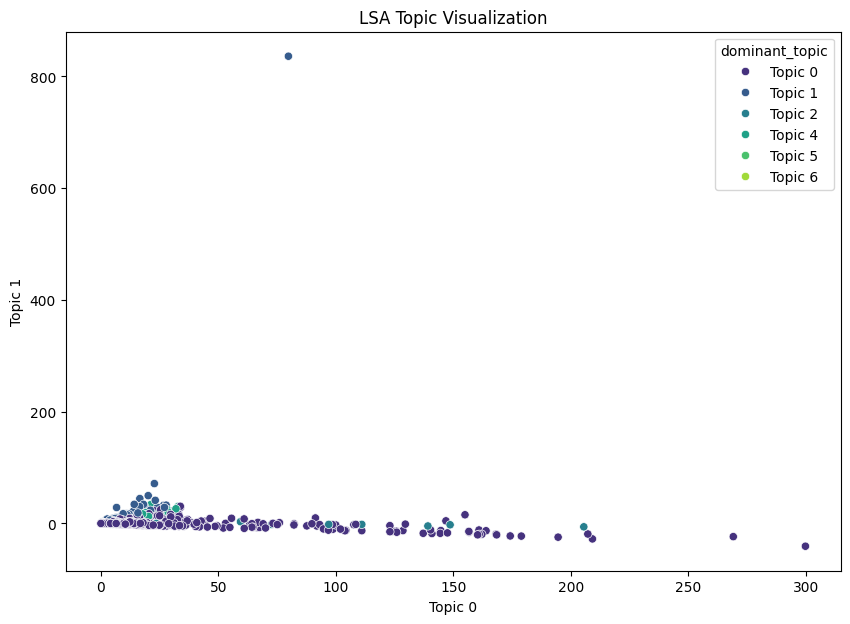

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_lsa_topics(lsa_topic_matrix, number_of_topics):
    """
    Input  : LSA topic matrix and number of topics
    Purpose: create a scatter plot to visualize the documents and their topic distribution
    """
    # Create a DataFrame with the LSA topic matrix
    df = pd.DataFrame(lsa_topic_matrix, columns=[f'Topic {i}' for i in range(number_of_topics)])

    # Create a column with the dominant topic for each document
    df['dominant_topic'] = df.idxmax(axis=1)

    # Create a scatter plot
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df, x='Topic 0', y='Topic 1', hue='dominant_topic', palette='viridis')
    plt.title('LSA Topic Visualization')
    plt.show()

# Usage:
plot_lsa_topics(lsa_topic_matrix, number_of_topics=7)
